# 氏名： 
# 作成年月日：

# 課題１：プログラム上での画像の扱い

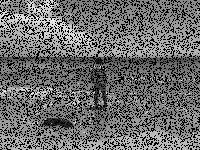

In [8]:
import numpy as np
from IPython.display import Image, display_png

#データ読み込み
data = np.loadtxt("./課題１〜３/sea_missing.csv",delimiter=",")

#データ出力
from PIL import Image
im_task_1 = Image.fromarray(np.uint8(data))
im_task_1.save("task1.jpeg")

#画像表示
path = "task1.jpeg"
display(Image.open(path))

# 課題２：SVTアルゴリズムの実装

In [9]:
#関数
def svt_algorithm(missing_data, mask_data, tuning_tau=None, tau=None, delta=None, epsilon=0.000001, k_max=1000):
    #STEP2
    Y0 = np.zeros_like(missing_data)
    #STEP3
    tau = tuning_tau * 2.5 * np.sum(missing_data.shape)
    delta = 1.2 * np.prod(missing_data.shape) / np.sum(mask_data)
    #STEP4
    for i in range(k_max):
        print(i)
        #STEP5
        U, S, V = np.linalg.svd(Y0, full_matrices=False)
        #STEP6      
        S = np.maximum(S - tau, 0)
        #STEP7
        X = np.linalg.multi_dot([U, np.diag(S), V])
        #STEP8
        Y0 += delta * mask_data * (missing_data - X)
        #STEP9
        stop = np.linalg.norm(mask_data * (X - missing_data)) / np.linalg.norm(mask_data * missing_data)
        
        if stop < epsilon:
            break

    return X

# 課題３：画像の補完

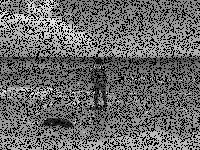

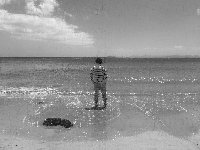

In [11]:
import numpy as np

#データ読み込み
sea_missing = np.loadtxt("./課題１〜３/sea_missing.csv",delimiter=",")
sea_mask = np.loadtxt("./課題１〜３/sea_mask.csv",delimiter=",")

#SVD実行 tau = 30 k_max = 10000が一番良い
task_3 = svt_algorithm(sea_missing, sea_mask, tuning_tau=15, k_max=10000)

#画像保存
from PIL import Image
im_task_3 = Image.fromarray(np.uint8(task_3))
im_task_3.save("task3.png")

#画像表示
path = "task1.png"
display(Image.open(path))
path_task3 = "task3.png"
display(Image.open(path_task3))